 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gerberlab/MDSINE2_Paper/blob/dem_add_tutorials/tutorials/tut_01_viz_data.ipynb)

# Tutorial 1: Understanding and visualizing data
MDSINE2 uses the following data files to infer the dynamics of the microbial network:  
1. Count data of microbial abundances
2. Taxonomy information corresponding to the count data
3. A "metadata" file mapping sample IDs to subject IDs and timepoints
4. A file specifying the experimental perturbations 
5. Quantitative measurements of absolute abundnace via qPCR

We'll start by looking at some examples of these files and plot their contents. 

Our experiment contained 4 subjects, with subject IDs 2, 3, 4, and 5. Stool samples were collected over a period of 77 days, with samples collected more frequently near the experimental perturbations. In these tutorials, we'll use a truncated version of the dataset containing only the top 15 most abundant ASVs. 

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !curl -LJO https://github.com/gerberlab/MDSINE2_Paper/raw/dem_add_tutorials/datasets/gibson/tutorial_data/healthy-toy.zip
    !mkdir -p ./data/ && unzip -o raw_tables.zip -d ./data/

    !git clone https://github.com/gerberlab/MDSINE2
    !pip install MDSINE2/.

else:
    # If running locally, ensure data paths are correct and MDSINE2 is installed.
    %cd ..

/home/danmacdonald/Projects/MDSINE2_Paper


In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Out data will be stored within this folder. 
data_dir = Path('./datasets/gibson/')
healthy_dir = data_dir / 'raw_tables'

In [3]:
# Read the data files. Our data is stored in tab-seperated files in `data_dir`.
# This line finds all tsv files in the specified directory.
tsv_files = sorted(healthy_dir.glob('*.tsv'))
tsv_files = {f.stem : f for f in tsv_files}

if len(tsv_files.keys()) > 0:
    for key in tsv_files.keys():
        print(f"Found file {tsv_files[key]}")
else:
    print("Can't find any `*.tsv` files!")

Found file datasets/gibson/raw_tables/counts.tsv
Found file datasets/gibson/raw_tables/metadata.tsv
Found file datasets/gibson/raw_tables/perturbations.tsv
Found file datasets/gibson/raw_tables/qpcr.tsv
Found file datasets/gibson/raw_tables/rdp_species.tsv
Found file datasets/gibson/raw_tables/silva_species.tsv


## Count data
First, let's look at the top-10 ASVs in the `counts.tsv` file. The column names indicate the sample ID, and rows are indexed by ASV. A table like this may be generated, for example, by `dada2`. 

After, we'll convert our counts table to relative abundance by dividing each column by it's read depth. We'll plot this data later on.

In [4]:
counts = pd.read_csv(tsv_files['counts'], index_col=0, sep='\t')
counts = counts.head(n = 15)
counts.head(n = 10)

,1-D0AM,1-D0PM,1-D1AM,1-D1PM,1-D29AM,1-D29PM,1-D2AM,1-D2PM,1-D3AM,1-D3PM,...,M2-D8-2A,M2-D8-2B,M2-D8-3A,M2-D8-3B,M2-D9-1A,M2-D9-1B,M2-D9-2A,M2-D9-2B,M2-D9-3A,M2-D9-3B
ASV_1,0,9,9,53,2729,3232,449,871,749,717,...,1717,2128,2121,2348,3313,2911,3834,3104,3626,3341
ASV_2,43,32,65,90,9482,7161,397,2187,3357,3793,...,14958,13749,14356,17205,13423,11314,19051,15783,18266,12650
ASV_3,50,107,946,2962,17,27,4990,6481,6429,7640,...,17145,16980,17800,19574,23115,20850,27270,21064,26375,22036
ASV_4,47,228,1865,7008,953,1816,7132,4299,3885,4484,...,64,68,75,82,104,65,123,100,107,97
ASV_5,18,45,487,1077,2350,1613,1949,2197,2477,2388,...,451,464,484,511,657,614,828,586,725,634
ASV_6,51,83,2069,4632,681,333,4669,4622,7625,10243,...,6957,6906,6726,8258,6794,5493,7974,5976,7531,6026
ASV_7,4,3,0,0,1672,1024,24,3,84,7,...,5642,6832,6727,6531,6583,7404,11008,6109,9746,5733
ASV_8,92,263,822,209,2630,3238,258,196,242,1312,...,3572,3336,3290,3858,176,175,213,141,204,135
ASV_9,8,31,7438,6091,18,8,6674,16086,3006,2925,...,74,102,20,40,26,18,19,57,39,46
ASV_10,0,5,10,11,776,742,128,60,849,844,...,218,238,195,277,252,276,322,274,338,213


In [5]:
read_depth = counts.sum(axis=0)
rel_abund = counts / read_depth
print('Check: all columns of `rel_abund` dataframe sum to 1?', np.isclose(rel_abund.sum(axis=0), 1).all())

Check: all columns of `rel_abund` dataframe sum to 1? True


## Taxonomy
Let's also look at the taxonomy file, which maps ASVs to their taxon. Note, the index of `counts.tsv` and `rdp_species.tsv` match.

In [6]:
rdp = pd.read_csv(tsv_files['rdp_species'], index_col=0, sep='\t')
rdp = rdp.fillna('unspecified')
rdp.head(n = 10)

,sequence,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis
ASV_2,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unspecified
ASV_3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,unspecified
ASV_6,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,uniformis
ASV_7,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Parasutterella,excrementihominis
ASV_8,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unspecified
ASV_9,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCA...,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia/Shigella,unspecified
ASV_10,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides,goldsteinii


## Metadata
The columns in `counts.tsv` are indexed by sample ID, but aren't necessarily ordered by time. The mapping between sample ID and temporal index is stored in the metadata file.

In [7]:
metadata = pd.read_csv(tsv_files['metadata'], index_col = 0, sep='\t')
metadata.head(n = 10)

,subject,time
sampleID,,
1-D0AM,1,0.0
1-D0PM,1,0.5
1-D1AM,1,1.0
1-D1PM,1,1.5
1-D29AM,1,29.0
1-D29PM,1,29.5
1-D2AM,1,2.0
1-D2PM,1,2.5
1-D3AM,1,3.0


## Perturbations
In our experiment, three perturbations were applied to each subject. The `perturbations.tsv` file contains the name, start time, and end time for each peturbation. 

In [8]:
perturbations = pd.read_csv(tsv_files['perturbations'], index_col = 0, sep='\t')
perturbations.head(n = 10)

,start,end,subject
name,,,
High Fat Diet,21.5,28.5,2
High Fat Diet,21.5,28.5,3
High Fat Diet,21.5,28.5,4
High Fat Diet,21.5,28.5,5
Vancomycin,35.5,42.5,2
Vancomycin,35.5,42.5,3
Vancomycin,35.5,42.5,4
Vancomycin,35.5,42.5,5
Vancomycin,35.5,42.5,6


## qPCR
In order to quantify the absolute abundance of each microbe within each sample, we need a quantitative reference of the total microbial content. Each row in this qPCR data corresponds to a column in the count table indicating three measurements of the total microbial abundance. 

In [9]:
qpcr = pd.read_csv(tsv_files['qpcr'], index_col = 0, sep='\t')
qpcr.head(n = 10)

,measurement1,measurement2,measurement3
sampleID,,,
2-D0AM,8.097580e+06,8.536466e+06,9.538355e+06
2-D0PM,2.972797e+07,5.614127e+07,2.436439e+07
2-D10,4.129004e+10,6.423568e+10,8.384557e+10
2-D11,2.981363e+10,6.587538e+10,5.077812e+10
2-D14,1.647771e+10,7.104907e+10,2.498869e+10
2-D16,3.666487e+10,6.237899e+10,3.875999e+10
2-D18,4.523257e+10,2.320504e+10,2.330249e+10
2-D1AM,1.516078e+11,3.825761e+11,2.321296e+11
2-D1PM,4.096268e+09,1.033714e+10,1.036558e+10


## Plotting the relative abundance
Let's plot the relative abundance of the most abundant taxa for one subject as a stacked bar chart. To do this, we'll need to extract data for one subject from the `rel_abund` dataframe, and then make sure it's in the right temporal order. We'll use subject 2--try changing `subj_ID` to 3, 4, or 5.

In [10]:
subj_ID = 2

# These are the sample ids that that correspond to subject 2. 
sample_ids = [x for x in rel_abund.columns if x.startswith(f'{subj_ID}-')]
metadata = metadata.loc[sample_ids].sort_values(by = 'time')
sample_ids = metadata.index 

# To test that our sorting makes sense, we can view the temporal metadata, 
# or check that time is stricly ascending.
print('Check: samples ordered correctly?:', np.all(np.diff(metadata.loc[sample_ids]['time']) > 0))

Check: samples ordered correctly?: True


(-0.75, 76.75, 0.0, 1.05)

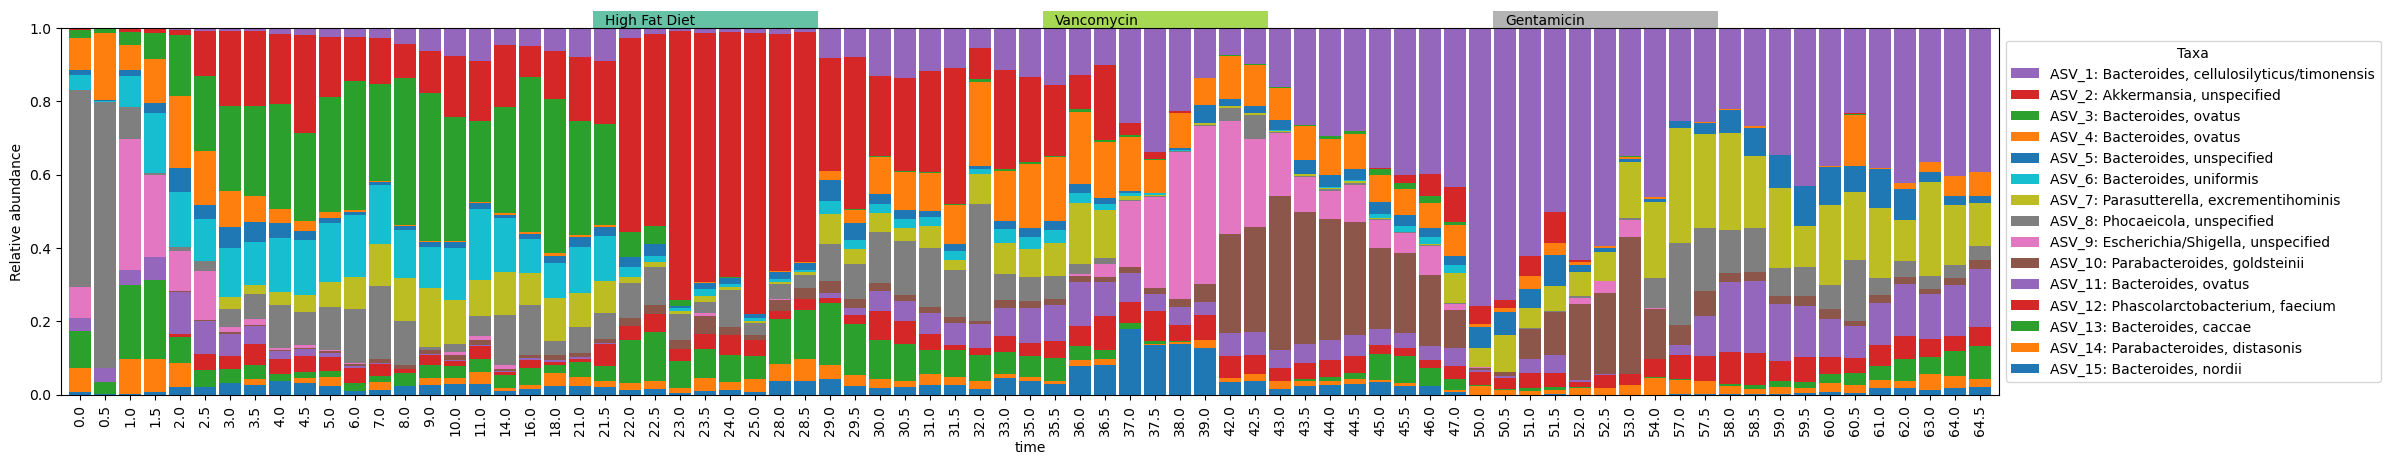

In [11]:
# Now we'll plot the data. First we use the sorted sample IDs from above
# to extract data for our subject, then we use matplotlib and pandas 
# to plot.
rel_abund_subj = rel_abund[sample_ids]

fig, ax = plt.subplots(2, 1, sharex=True,
                       gridspec_kw={'hspace': 0.0, 'wspace': 0.0, 
                                    'height_ratios' : [1,20]})

# The index [::-1] just reverses the order of the dataframe. We only do this 
# so that the most abundant taxa are at the top of the plot. Note, we also 
# reverse the ordering in the legend below. We also add the time data from
# the metadata file to the x axis.
rel_abund_subj_plot = rel_abund_subj[::-1].T
rel_abund_subj_plot['time'] = metadata.loc[sample_ids]['time']

rel_abund_subj_plot.plot.bar(
    x='time',
    width=0.9,
    figsize=(25,5),
    ax=ax[1],
    stacked=True,
    legend=True,
    )

ax[1].set_ylabel('Relative abundance')

# We'll also update the legend so that it displays <ASV>: <genus>, <species> 
# data for each ASV.

handles, labels = ax[1].get_legend_handles_labels()

rdp['legend_tag'] = rdp.index + ': ' + \
    rdp['Genus'] + ', ' + rdp['Species']

legend_tags = list(rdp.loc[labels[::-1]]['legend_tag'])

ax[1].legend(
    handles = handles[::-1],
    labels = legend_tags,
    loc='center left',
    bbox_to_anchor=(1., 0.5),
    title='Taxa',
    )

ax[1].set_ylim([0,1])

# We can also use the perturbation dataset to highlight the times 
# where perturbations were applied.
perturb_subj = perturbations[perturbations['subject'] == subj_ID]

df = pd.DataFrame(columns=list(perturb_subj.index) + ['time'])
df['time'] = metadata.loc[sample_ids]['time']
df['idx'] = range(df.shape[0])

for pert_name in perturb_subj.index:
    df[pert_name] = None
    start = perturb_subj.loc[pert_name]['start']
    end = perturb_subj.loc[pert_name]['end']
    index = np.logical_and(df['time'] >= start, df['time'] <= end)
    df.loc[index, pert_name] = 1 
    ax[0].annotate(pert_name, (df['idx'][df['time'] == start], 0.2))

df.plot.bar(
    x='time',
    y=perturb_subj.index,
    width=1.0,
    colormap='Set2',
    ax=ax[0],
    stacked=True,
    legend=False,
    )

ax[0].axis('off')

## Preparing data for MDSINE2
Once MDSINE2 has parsed your `*.tsv` files, you can use the built in plotting tools, which we'll demonstrate here. We'll create truncated `*.tsv` files here to limit the number of ASVs to be plotted.

In [12]:
import mdsine2 as md2
from mdsine2.util import make_toy

[DEBUG] Using default logger (stdout, stderr).


In [28]:
# Read data into study object
# healthy = md2.dataset.parse(
#     name = healthy_dir.stem,
#     metadata = tsv_files['metadata'],
#     taxonomy = tsv_files['rdp_species'],
#     reads = tsv_files['counts'],
#     qpcr = tsv_files['qpcr'],
#     perturbations = tsv_files['perturbations'],
# )

toy_study = make_toy(
    metadata_f=tsv_files['metadata'],
    qpcr_f=tsv_files['qpcr'],
    reads_f=tsv_files['counts'],
    taxa_f=tsv_files['rdp_species'],
    perturbations_f=tsv_files['perturbations'],
    n_taxa=100,
    )

[INFO] TaxaSet parsng new taxonomy table. Resetting
[INFO] No `name` found - assuming index is the name
[DEBUG] Reseting perturbations
Sample ID 1-D0AM time 0.0


AttributeError: 'NoneType' object has no attribute 'data'

In [ ]:
# The color of this plot may differ from the previous, but the data is the same. 
fig, ax = plt.subplots(1,1, figsize=(15, 3))
ax = md2.visualization.taxonomic_distribution_over_time(healthy['2'], taxlevel='asv', ax=ax)
